# Question 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\panka\AppData\Local\Temp\ipykernel_15324\799881091.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
#Checking for correlation
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


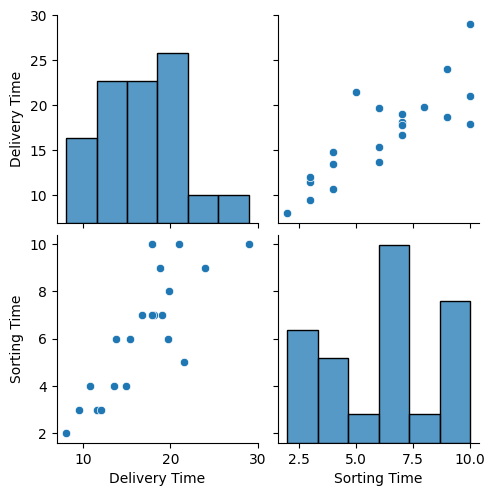

In [7]:
sns.pairplot(df)

<Axes: >

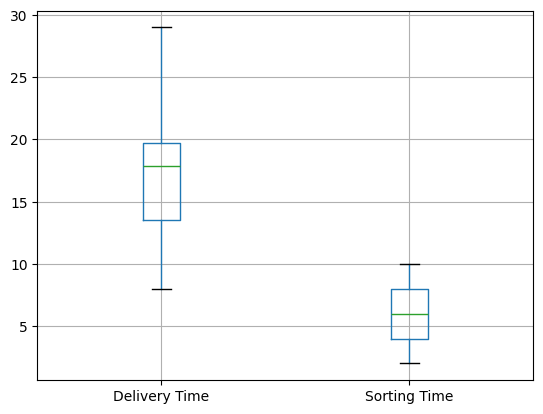

In [10]:
# Checking for oytliers
df.boxplot()

In [15]:
# identifying dependent and independent
x=df[['Sorting Time']]
y=df['Delivery Time']


In [16]:
x

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [17]:
y

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery Time, dtype: float64

In [19]:
# Scaling data in standard form
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 1.53562462],
       [-0.88298415],
       [-0.07678123],
       [ 1.13252315],
       [ 1.53562462],
       [-0.07678123],
       [ 0.32632023],
       [-1.28608562],
       [ 1.53562462],
       [ 1.13252315],
       [ 0.72942169],
       [-0.88298415],
       [ 0.32632023],
       [-1.28608562],
       [-1.28608562],
       [-0.88298415],
       [-0.07678123],
       [ 0.32632023],
       [-1.68918708],
       [ 0.32632023],
       [-0.47988269]])

In [22]:
# slippting data in train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [23]:
x_train

array([[-0.88298415],
       [ 1.13252315],
       [-1.68918708],
       [-0.07678123],
       [-1.28608562],
       [-0.07678123],
       [ 1.13252315],
       [-0.47988269],
       [ 1.53562462],
       [ 0.32632023],
       [-1.28608562],
       [ 0.72942169],
       [-1.28608562],
       [ 0.32632023],
       [ 0.32632023]])

In [24]:
x_test

array([[ 1.53562462],
       [ 0.32632023],
       [-0.88298415],
       [-0.88298415],
       [ 1.53562462],
       [-0.07678123]])

# Model building using sklearn

In [25]:

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [31]:
# Prediction
y_pred=reg.predict(x_test)
y_pred

array([25.02776612, 18.95170915, 12.87565217, 12.87565217, 25.02776612,
       16.92635682])

In [34]:
reg.coef_

array([5.02442317])

In [35]:
reg.intercept_

17.312138216605984

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-1.0037521141687815

In [37]:
r2_score(y_train,reg.predict(x_train))

0.7634418923966002

# Building model using statsmodels

In [39]:
df.head() 

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [58]:
df.rename(columns={'delivery time':'Delivery_Time','sorting time':'Sorting_Time'},inplace=True)

In [59]:
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [60]:
import statsmodels.formula.api as smf
model=smf.ols('Delivery_Time~Sorting_Time',data=df).fit()

In [61]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [62]:
model.rsquared

0.6822714748417231

In [63]:
model.rsquared_adj

0.6655489208860244

In [70]:
new=pd.DataFrame(pd.Series([11,6,8]),columns=['Sorting_Time'])

In [71]:
new

,Sorting_Time
0,11
1,6
2,8


In [72]:
model.predict(new)

0    24.721953
1    16.476853
2    19.774893
dtype: float64

# Question 2

In [73]:
sal_df=pd.read_csv('Salary_Data.csv')
sal_df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [74]:
sal_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [78]:
sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [79]:
sal_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


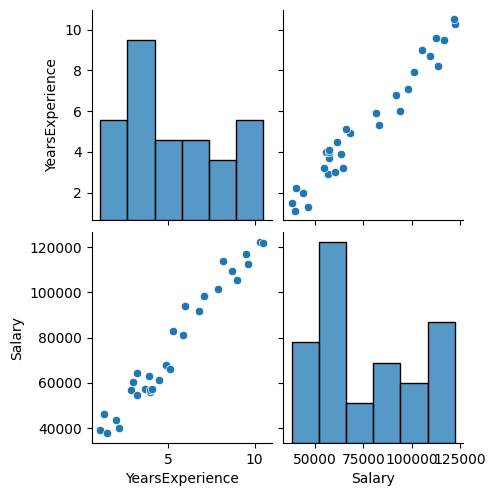

In [80]:
sns.pairplot(sal_df)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

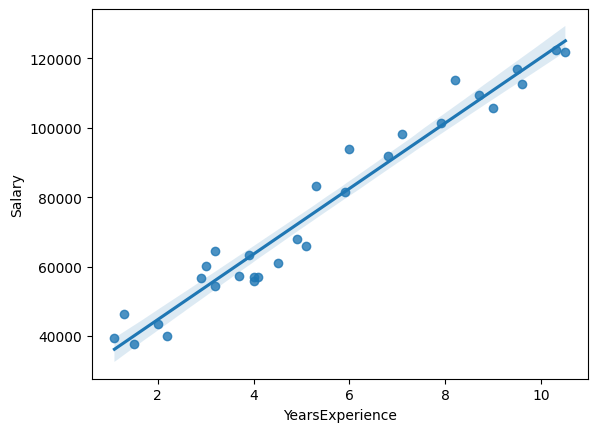

In [81]:
sns.regplot(x='YearsExperience',y='Salary',data=sal_df)

# Model building using statsmodels

In [84]:
import statsmodels.formula.api as smf
model=smf.ols('Salary~YearsExperience',data=sal_df).fit()

In [85]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [86]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [88]:
new=pd.DataFrame(pd.Series([2.3,2.4,4.5,5.5,5.7]),columns=['YearsExperience'])

In [89]:
model.predict(new)

0    47527.113538
1    48472.109770
2    68317.030645
3    77766.992967
4    79656.985431
dtype: float64

# Model building using sklearn

In [90]:
sal_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [94]:
x=sal_df[['YearsExperience']]
x
y=sal_df['Salary']
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [95]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [97]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [98]:
reg.predict(x_test)

array([115439.88180109,  71396.10622651, 102320.45928951,  75144.51265839,
        55465.37889103,  60150.88693088, 121999.59305688, 107005.96732936])

In [99]:
x_test

array([[ 1.5363355 ],
       [-0.1481381 ],
       [ 1.03457741],
       [-0.00477865],
       [-0.75741579],
       [-0.57821647],
       [ 1.78721455],
       [ 1.21377673]])

In [100]:
from sklearn.metrics import r2_score
r2_score(y_train,reg.predict(x_train))

0.9553880313075513